In [1]:
import pickle
import numpy as np
import matplotlib.pylab as plt
import os
from scipy import interpolate

2482
1708
1495
2669
1849
1491
1962
1134
1669
2276
1693
1688
1839
1802
2021
2276
1774
1391
2642
1742
1490
1377
1563
2193
1472
1929
2274
1640
1757
2648
2470
2333
2208
1773
1133
1482
1552
1371
2207
1697
2498
1917
2680
1953
1574
2451
1439
1600
1899
1795
2169
2459
2441
1681
2021
1286
1384
1866
1410
1676
1929
1299
2032
2281
1876
1339
2356
2038
1670
2048
2134
1896
1966
2159
1733
2003
2299


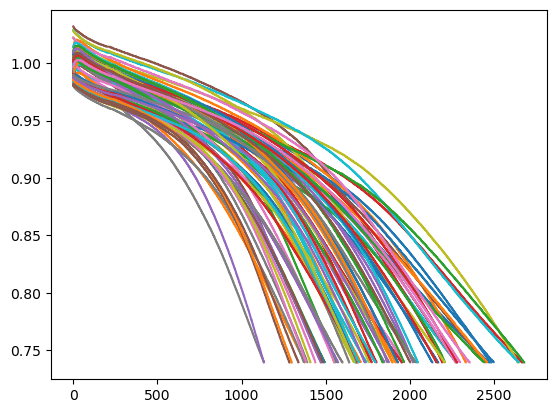

In [27]:
def interp(v, q, num):
    f = interpolate.interp1d(v,q,kind='linear')
    v_new = np.linspace(v[0],v[-1],num)
    q_new = f(v_new)
    vq_new = np.concatenate((v_new.reshape(-1,1),q_new.reshape(-1,1)),axis=1)
    return q_new

n_cyc = 100
in_stride = 10
fea_num = 100

v_low = 3.36
v_upp = 3.60
q_low = 610
q_upp = 1190
rul_factor = 3000
cap_factor = 1190
fea_num =3

for name in os.listdir("./Datasets/our_data"):
    name = name[0:-4]

    bat1 = pickle.load(open(r'./Datasets/our_data/'+name+'.pkl', 'rb'))
    # list(bat1['1-2']['data'].keys())[9:]


    A_rul = bat1[name]['rul']
    A_dq = bat1[name]['dq']
    A_df = bat1[name]['data']
    all_idx = list(A_dq.keys())[9:]
    all_fea, rul_lbl, cap_lbl = [], [], []
    for cyc in all_idx:
        tmp = A_df[cyc]
        tmp = tmp.loc[tmp['Status'].apply(lambda x: not 'discharge' in x)]
        
        left = (tmp['Current (mA)']<5000).argmax() + 1
        right = (tmp['Current (mA)']<1090).argmax() - 2

        tmp = tmp.iloc[left:right]

        tmp_v = tmp['Voltage (V)'].values
        tmp_q = tmp['Capacity (mAh)'].values
        tmp_t = tmp['Time (s)'].values
        v_fea = interp(tmp_t, tmp_v, fea_num)
        q_fea = interp(tmp_t, tmp_q, fea_num)

        tmp_fea = np.hstack((v_fea.reshape(-1,1), q_fea.reshape(-1,1)))
        
        all_fea.append(np.expand_dims(tmp_fea,axis=0))
        rul_lbl.append(A_rul[cyc])
        cap_lbl.append(A_dq[cyc])
    all_fea = np.vstack(all_fea)
    rul_lbl = np.array(rul_lbl)
    cap_lbl = np.array(cap_lbl)

    all_fea_c = all_fea.copy()
    all_fea_c[:,:,0] = (all_fea_c[:,:,0]-v_low)/(v_upp-v_low)
    all_fea_c[:,:,1] = (all_fea_c[:,:,1]-q_low)/(q_upp-q_low)
    dif_fea = all_fea_c - all_fea_c[0:1,:,:]
    all_fea = np.concatenate((all_fea,dif_fea),axis=2)

    plt.plot(cap_lbl/cap_factor)

In [21]:
name = "1-2"
bat1 = pickle.load(open(r'./Datasets/our_data/'+name+'.pkl', 'rb'))
# bat1[name].keys()

2669


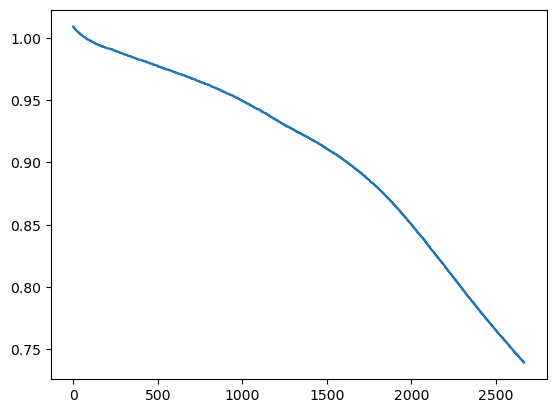

In [22]:
# list(bat1['1-2']['data'].keys())[9:]


n_cyc = 100
in_stride = 10
fea_num = 100

v_low = 3.36
v_upp = 3.60
q_low = 610
q_upp = 1190
rul_factor = 3000
cap_factor = 1190


fea_num =3
def interp(v, q, num):
    f = interpolate.interp1d(v,q,kind='linear')
    v_new = np.linspace(v[0],v[-1],num)
    q_new = f(v_new)
    vq_new = np.concatenate((v_new.reshape(-1,1),q_new.reshape(-1,1)),axis=1)
    return q_new

A_rul = bat1[name]['rul']
A_dq = bat1[name]['dq']
A_df = bat1[name]['data']
all_idx = list(A_dq.keys())[9:]
all_fea, rul_lbl, cap_lbl = [], [], []
for cyc in all_idx:
    tmp = A_df[cyc]
    tmp = tmp.loc[tmp['Status'].apply(lambda x: not 'discharge' in x)]
    
    left = (tmp['Current (mA)']<5000).argmax() + 1
    right = (tmp['Current (mA)']<1090).argmax() - 2

    tmp = tmp.iloc[left:right]

    tmp_v = tmp['Voltage (V)'].values
    tmp_q = tmp['Capacity (mAh)'].values
    tmp_t = tmp['Time (s)'].values
    v_fea = interp(tmp_t, tmp_v, fea_num)
    q_fea = interp(tmp_t, tmp_q, fea_num)

    tmp_fea = np.hstack((v_fea.reshape(-1,1), q_fea.reshape(-1,1)))
    
    all_fea.append(np.expand_dims(tmp_fea,axis=0))
    rul_lbl.append(A_rul[cyc])
    cap_lbl.append(A_dq[cyc])
all_fea = np.vstack(all_fea)
rul_lbl = np.array(rul_lbl)
cap_lbl = np.array(cap_lbl)

all_fea_c = all_fea.copy()
all_fea_c[:,:,0] = (all_fea_c[:,:,0]-v_low)/(v_upp-v_low)
all_fea_c[:,:,1] = (all_fea_c[:,:,1]-q_low)/(q_upp-q_low)
dif_fea = all_fea_c - all_fea_c[0:1,:,:]
all_fea = np.concatenate((all_fea,dif_fea),axis=2)

plt.plot(cap_lbl/cap_factor)
print(len(cap_lbl))

In [14]:

all_fea

array([[[ 3.37230000e+00,  8.59876256e+02,  0.00000000e+00,
          0.00000000e+00],
        [ 3.43435000e+00,  9.98082922e+02,  0.00000000e+00,
          0.00000000e+00],
        [ 3.58560000e+00,  1.13628702e+03,  0.00000000e+00,
          0.00000000e+00]],

       [[ 3.37230000e+00,  8.59871583e+02,  0.00000000e+00,
         -8.05555556e-06],
        [ 3.43400000e+00,  9.97314544e+02, -1.45833333e-03,
         -1.32478927e-03],
        [ 3.58280000e+00,  1.13475396e+03, -1.16666667e-02,
         -2.64321839e-03]],

       [[ 3.37230000e+00,  8.59872344e+02,  0.00000000e+00,
         -6.74329502e-06],
        [ 3.43370000e+00,  9.97313122e+02, -2.70833333e-03,
         -1.32724138e-03],
        [ 3.58350000e+00,  1.13475224e+03, -8.75000000e-03,
         -2.64616858e-03]],

       ...,

       [[ 3.38540000e+00,  6.33835764e+02,  5.45833333e-02,
         -3.89724986e-01],
        [ 3.45250000e+00,  7.32333750e+02,  7.56250000e-02,
         -4.58188228e-01],
        [ 3.58660000e+00

In [57]:
np.expand_dims(tmp_fea,axis=0)

array([[[   3.3751    ,  859.74173611],
        [   3.4365    , 1009.38395556],
        [   3.5869    , 1159.0238    ]]])

In [24]:
bat1['1-1']['dq']

{1: 1174.2992,
 2: 1173.1189555555557,
 3: 1172.5066444444444,
 4: 1171.9004222222222,
 5: 1171.2945333333332,
 6: 1171.2867111111111,
 7: 1170.6743777777779,
 8: 1170.6697111111112,
 9: 1170.6636222222223,
 10: 1170.0476666666666,
 11: 1170.0405333333333,
 12: 1169.4238,
 13: 1169.414288888889,
 14: 1169.4155333333333,
 15: 1168.8119555555556,
 16: 1168.8009777777777,
 17: 1168.804688888889,
 18: 1168.2006888888889,
 19: 1168.195311111111,
 20: 1168.202622222222,
 21: 1167.5969333333333,
 22: 1167.6103555555555,
 23: 1167.5882888888889,
 24: 1167.565,
 25: 1167.5591333333332,
 26: 1167.5221999999999,
 27: 1166.8688222222222,
 28: 1166.8834222222222,
 29: 1166.8656222222223,
 30: 1166.8665777777778,
 31: 1166.2456444444447,
 32: 1166.2467333333334,
 33: 1166.2398,
 34: 1166.2232,
 35: 1166.235488888889,
 36: 1166.2312444444444,
 37: 1165.6056888888888,
 38: 1165.592488888889,
 39: 1165.5801111111111,
 40: 1165.5770222222222,
 41: 1165.5771111111112,
 42: 1164.960888888889,
 43: 1164.95